# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Lists
city_name = []
cloud = []
date = []
humid = []
country = []
lat = []
lng = []
temp = []
speed = []

#Counters
record = 1
sets = 1

#URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#Print Data record strings
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities
for city in cities:
    city1 = city.replace(" ", "%20")
    if record == 51:
        record = 1
        sets = sets + 1
    #Try incase if city in list is not in api
    try: 
        response = requests.get(f"{url}&q={city1}").json() 
        city_name.append(response["name"])
        cloud.append(response["clouds"]["all"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        speed.append(response["wind"]["speed"])
        #Print Record and set
        print(f'Processing Record {record} of Set {sets} | {city}' )
        print(f"{url}&q={city1}")
        
        #Increase record count
        record= record + 1

    except:
        print("City not found. Skipping...")
        
    continue
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=rikitea
City not found. Skipping...
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=busselton
Processing Record 3 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=port%20alfred
City not found. Skipping...
Processing Record 4 of Set 1 | camacupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=camacupa
Processing Record 5 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=jamestown
Processing Record 6 of Set 1 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2b

Processing Record 3 of Set 2 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=flinders
Processing Record 4 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=hobart
Processing Record 5 of Set 2 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=hirara
Processing Record 6 of Set 2 | mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=mercedes
Processing Record 7 of Set 2 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=ambon
Processing Record 8 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=dikson
Processing Record 9 of Set 2 | santa barbara
http://api.openweathermap.org/data/2.5/weather?units=Imperial

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=upernavik
Processing Record 7 of Set 3 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=praya
Processing Record 8 of Set 3 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=bilma
Processing Record 9 of Set 3 | astana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=astana
Processing Record 10 of Set 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=vaini
Processing Record 11 of Set 3 | vilani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=vilani
Processing Record 12 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=tiksi
Proc

Processing Record 10 of Set 4 | namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=namatanai
Processing Record 11 of Set 4 | chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=chumikan
Processing Record 12 of Set 4 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=vila%20franca%20do%20campo
Processing Record 13 of Set 4 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=airai
Processing Record 14 of Set 4 | berlin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=berlin
Processing Record 15 of Set 4 | mozelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=mozelos
Processing Record 16 of Set 4 | jacareacanga
http://api.openwe

Processing Record 12 of Set 5 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=port%20hedland
Processing Record 13 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=iqaluit
Processing Record 14 of Set 5 | elliot lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=elliot%20lake
Processing Record 15 of Set 5 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=karratha
Processing Record 16 of Set 5 | lichinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=lichinga
Processing Record 17 of Set 5 | xingcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=xingcheng
Processing Record 18 of Set 5 | kpalime
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=katikati
Processing Record 15 of Set 6 | mangualde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=mangualde
Processing Record 16 of Set 6 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=faanui
Processing Record 17 of Set 6 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=norman%20wells
Processing Record 18 of Set 6 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=constitucion
Processing Record 19 of Set 6 | mwanza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=mwanza
City not found. Skipping...
Processing Record 20 of Set 6 | lata
http://api.openweathermap.org/data/2.5/weather

Processing Record 17 of Set 7 | bafia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=bafia
Processing Record 18 of Set 7 | khorol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=khorol
Processing Record 19 of Set 7 | axim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=axim
City not found. Skipping...
Processing Record 20 of Set 7 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=flin%20flon
Processing Record 21 of Set 7 | skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=skjervoy
Processing Record 22 of Set 7 | general higinio morinigo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=general%20higinio%20morinigo
Processing Record 23 of Set 7 | 

Processing Record 20 of Set 8 | paoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=paoua
Processing Record 21 of Set 8 | bermeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=bermeo
Processing Record 22 of Set 8 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=santiago
Processing Record 23 of Set 8 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=vostok
Processing Record 24 of Set 8 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=touros
Processing Record 25 of Set 8 | bayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=bayan
Processing Record 26 of Set 8 | liepaja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 23 of Set 9 | pulivendla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=pulivendla
City not found. Skipping...
Processing Record 24 of Set 9 | loikaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=loikaw
Processing Record 25 of Set 9 | valdemarpils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=valdemarpils
Processing Record 26 of Set 9 | corumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=corumba
City not found. Skipping...
Processing Record 27 of Set 9 | akdagmadeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=akdagmadeni
Processing Record 28 of Set 9 | manzhouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=manzhouli
Processing R

Processing Record 25 of Set 10 | rodney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=rodney
Processing Record 26 of Set 10 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=comodoro%20rivadavia
Processing Record 27 of Set 10 | balingasay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=balingasay
Processing Record 28 of Set 10 | manicore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=manicore
Processing Record 29 of Set 10 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=bonthe
Processing Record 30 of Set 10 | modesto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=modesto
Processing Record 31 of Set 10 | dali
http://api.openweather

Processing Record 27 of Set 11 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=verkhoyansk
Processing Record 28 of Set 11 | elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=elko
Processing Record 29 of Set 11 | ouargaye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=ouargaye
Processing Record 30 of Set 11 | angoram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=angoram
City not found. Skipping...
Processing Record 31 of Set 11 | fredericton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=fredericton
Processing Record 32 of Set 11 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9e22c58b2bb2267e368284c4d39aa618&q=vangaindrano
Processing Record 33 of Set 11 | verkh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Dict for DF
w_dict = {
    "City": city_name,
    "Cloudiness":cloud, 
    "Country":country,
    "Date":date, 
    "Humidity": humid,
    "Latitude":lat, 
    "Longitu":lng, 
    "Max Temp": temp,
    "Wind Speed":speed}
#Make DF
weather = pd.DataFrame(w_dict)

#Count of Values in DF
weather.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Latitude      561
Longitu       561
Max Temp      561
Wind Speed    561
dtype: int64

In [5]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitu,Max Temp,Wind Speed
0,Rikitea,0,PF,1551584608,100,-23.12,-134.97,79.27,11.23
1,Busselton,0,AU,1551584832,23,-33.64,115.35,84.99,9.66
2,Port Alfred,44,ZA,1551584538,85,-33.59,26.89,68.00,6.53
3,Camacupa,68,AO,1551585243,91,-12.02,17.48,61.14,3.06
4,Jamestown,24,AU,1551584878,19,-33.21,138.60,96.82,11.79


In [6]:
#Save to CSV
weather.to_csv("Output/weather_data.csv" , index=False)
weather_data = pd.read_csv("Output/weather_data.csv")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitu,Max Temp,Wind Speed
0,Rikitea,0,PF,1551584608,100,-23.12,-134.97,79.27,11.23
1,Busselton,0,AU,1551584832,23,-33.64,115.35,84.99,9.66
2,Port Alfred,44,ZA,1551584538,85,-33.59,26.89,68.00,6.53
3,Camacupa,68,AO,1551585243,91,-12.02,17.48,61.14,3.06
4,Jamestown,24,AU,1551584878,19,-33.21,138.60,96.82,11.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

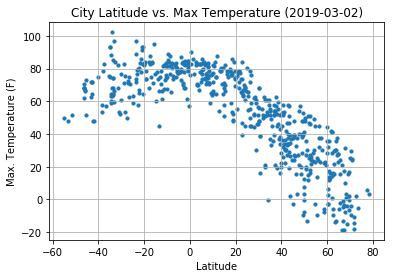

In [7]:
#Scatter Plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o", s=10)

#Titles of Graph
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output/Max_Temp_vs_Latitude.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

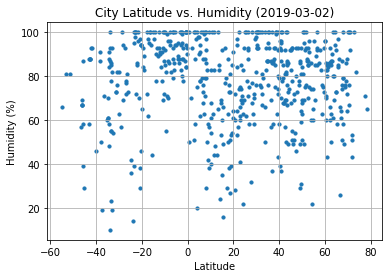

In [8]:
#Scatter Plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", s=10)

#Titles of Graph
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output/Humidity_vs_Latitude.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

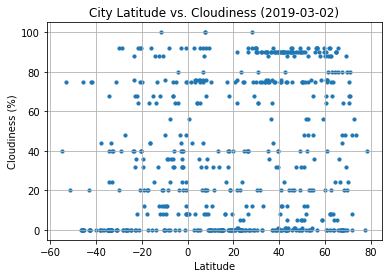

In [9]:
#Scatter Plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", s=10)

#Titles of Graph
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output/Cloudiness_vs_Latitude.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

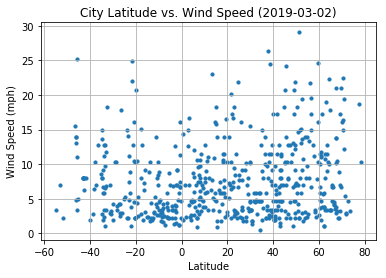

In [10]:
#Scatter Plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", s=10)

#Titles of Graph
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save plot
plt.savefig("Output/Wind_Speed_vs_Latitude.png")

#Show plot
plt.show()